In [1]:
import glob,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import seaborn as sns
from scipy.stats import *

In [2]:
files = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/scorefiles/v2/results/*_center_*20200506_*.tsv')
print('\n'.join(map(os.path.basename,files)))

all_beta_center_p00001_20200506_500PCs.spearmanr.tsv
all_z_center_p00001_20200506_300PCs.spearmanr.tsv
all_beta_center_p0001_20200506_300PCs.spearmanr.tsv
all_z_center_p1e-06_20200506_500PCs.spearmanr.tsv
all_beta_center_p0001_20200506_100PCs.spearmanr.tsv
all_beta_center_p1e-06_20200506_500PCs.spearmanr.tsv
all_z_center_p001_20200506_500PCs.spearmanr.tsv
all_z_center_p001_20200506_100PCs.spearmanr.tsv
all_z_center_p0001_20200506_300PCs.spearmanr.tsv
all_z_center_p1e-06_20200506_300PCs.spearmanr.tsv
all_beta_center_p1e-05_20200506_100PCs.spearmanr.tsv
all_z_center_p001_20200506_300PCs.spearmanr.tsv
all_beta_center_p1e-05_20200506_500PCs.spearmanr.tsv
all_z_center_p0001_20200506_500PCs.spearmanr.tsv
all_z_center_p1e-05_20200506_500PCs.spearmanr.tsv
all_beta_center_p001_20200506_100PCs.spearmanr.tsv
all_beta_center_p0001_20200506_500PCs.spearmanr.tsv
all_beta_center_p00001_20200506_300PCs.spearmanr.tsv
all_z_center_p00001_20200506_500PCs.spearmanr.tsv
all_beta_center_p001_20200506_300PCs

In [3]:
kind='RAW'
datas = dict([(os.path.basename(f)[4:-14].replace('_20200506','').replace('_center','').replace('Cs','C'),
               pd.read_table(f, index_col=0, usecols=['PHE','TRAIN_'+kind,'TEST_'+kind])) for f in files])

In [4]:
train=pd.DataFrame([datas[ds]['TRAIN_'+kind] for ds in datas], 
                    index=[ds for ds in datas]).T.dropna()
print(train.shape)
train.head()

(513, 30)


,beta_p00001_500PC,z_p00001_300PC,beta_p0001_300PC,z_p1e-06_500PC,beta_p0001_100PC,beta_p1e-06_500PC,z_p001_500PC,z_p001_100PC,z_p0001_300PC,z_p1e-06_300PC,...,beta_p1e-06_300PC,z_p00001_100PC,beta_p001_500PC,z_p0001_100PC,z_p1e-05_300PC,z_p1e-06_100PC,beta_p00001_100PC,beta_p1e-06_100PC,z_p1e-05_100PC,beta_p1e-05_300PC
BIN_FC10002159,0.005050,-0.005461,0.006307,0.009050,0.003472,0.003283,0.009121,0.017841,0.000632,0.001236,...,0.003430,-0.000275,0.045120,-0.001617,-0.002585,0.000880,0.001490,0.002706,-0.002292,0.001581
BIN_FC10002443,0.030101,0.022188,0.029312,0.027173,0.027851,0.064717,0.035496,0.026435,0.027402,0.020036,...,0.021084,0.013749,0.075622,0.020298,0.015987,0.009359,0.022778,0.019688,0.010868,0.019731
BIN_FC10002453,0.005060,0.019794,0.011537,0.003563,0.008106,-0.002420,0.121528,0.024214,0.022001,0.009698,...,-0.003978,0.017949,0.174702,0.020060,0.018232,0.008194,0.009896,-0.012064,0.018163,-0.006435
BIN_FC10002463,0.034932,0.039321,0.036833,0.002323,0.037687,0.039841,0.052008,0.046387,0.040338,0.039234,...,0.033487,0.033185,0.059429,0.035399,0.036929,0.030851,0.033245,0.031544,0.031188,0.030997
BIN_FC10002473,0.016395,0.010622,0.013715,0.000813,0.013018,0.015588,0.009807,0.010163,0.009315,0.013854,...,0.011631,0.010010,0.064678,0.009175,0.008626,0.011079,0.013900,0.009714,0.009921,0.010268


In [5]:
test=pd.DataFrame([datas[ds]['TEST_'+kind] for ds in datas], 
                    index=[ds for ds in datas]).T.dropna()
test.head()

,beta_p00001_500PC,z_p00001_300PC,beta_p0001_300PC,z_p1e-06_500PC,beta_p0001_100PC,beta_p1e-06_500PC,z_p001_500PC,z_p001_100PC,z_p0001_300PC,z_p1e-06_300PC,...,beta_p1e-06_300PC,z_p00001_100PC,beta_p001_500PC,z_p0001_100PC,z_p1e-05_300PC,z_p1e-06_100PC,beta_p00001_100PC,beta_p1e-06_100PC,z_p1e-05_100PC,beta_p1e-05_300PC
BIN_FC10002159,-0.005265,0.000418,0.013582,-0.003075,0.009838,0.002792,-0.003762,0.014606,-0.006684,0.007223,...,0.004281,0.002441,0.025599,-0.008120,0.004399,0.008354,0.007550,-0.000732,0.005265,-0.001839
BIN_FC10002443,0.022387,0.020678,0.022650,0.028657,0.022222,0.060731,0.036279,0.024345,0.024476,0.010780,...,0.015378,0.016015,0.041233,0.022074,0.012977,0.004888,0.018455,0.016782,0.011041,0.017794
BIN_FC10002453,0.011318,0.016192,0.009059,0.000130,0.010476,0.001858,0.017038,0.014941,0.018178,0.011734,...,0.007368,0.013440,0.011257,0.014903,0.018027,0.010823,0.016365,-0.001006,0.015232,0.003378
BIN_FC10002463,0.031497,0.039047,0.030357,0.004584,0.032120,0.039372,0.045420,0.037893,0.035829,0.039989,...,0.031690,0.031946,0.038293,0.030482,0.036525,0.029750,0.031078,0.029625,0.030336,0.029548
BIN_FC10002473,0.006644,0.014459,0.008465,0.005446,0.008632,0.008204,0.011005,0.010256,0.011531,0.011008,...,0.004192,0.010133,0.024179,0.011027,0.007868,0.006002,0.006015,0.002642,0.007202,0.004019


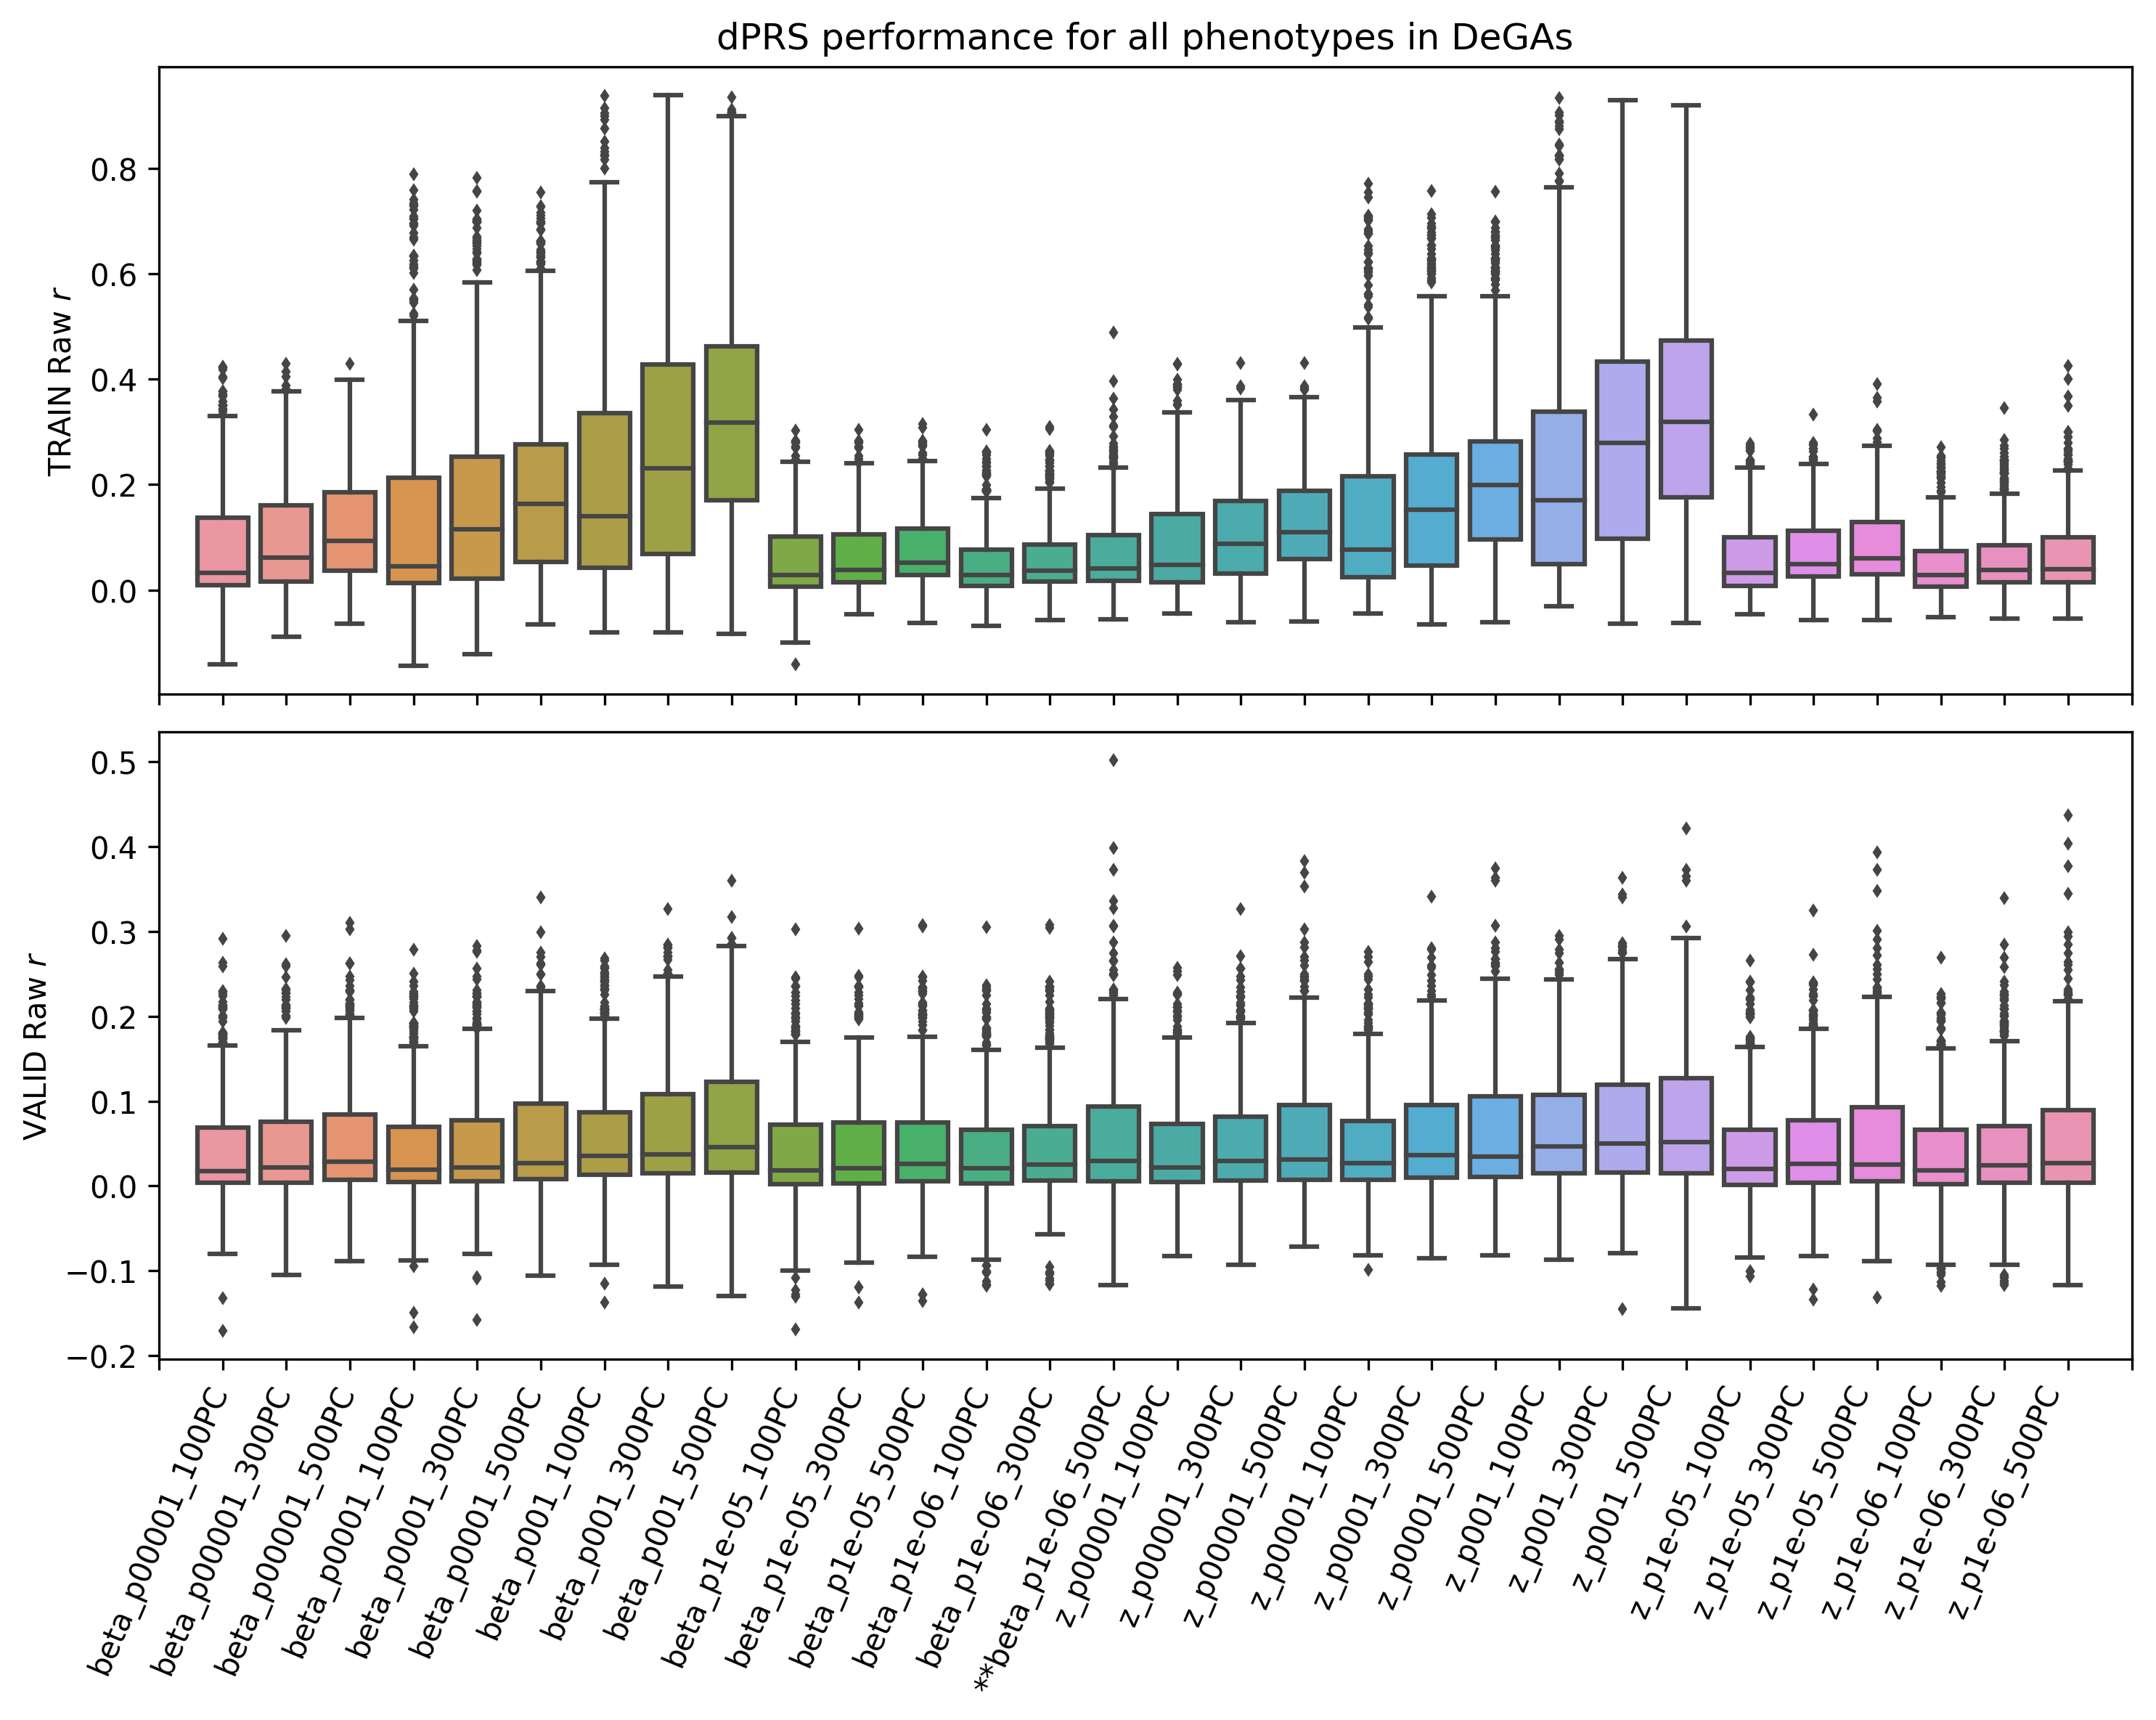

In [6]:
fig=plt.figure(figsize=(10,8),dpi=300)

key='beta_p1e-06_500PC'

# train
ax=plt.subplot(211)
sns.boxplot(x='dataset',y='rsq',
            data=train.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2, ax=ax)
ax.set_xticks(list(range(-1,len(files)+1)))
ax.set_xticklabels(['' for _ in ax.get_xticklabels()])
ax.set_xlabel('')
ax.set_ylabel(' '.join(['TRAIN',kind.lower().capitalize(),'$r$']))
plt.title('dPRS performance for all phenotypes in DeGAs')

# valid
ax=plt.subplot(212)
sns.boxplot(x='dataset',y='rsq',
            data=test.melt(var_name='dataset',value_name='rsq').sort_values('dataset'),
            fliersize=2, ax=ax)
            #showfliers=0, ax=ax)
ax.set_xticks(list(range(-1,len(files)+1)))
ax.set_xticklabels(map(lambda s:'**'+s if s==key else s, 
                       map(lambda i:str(i.get_text()), ax.get_xticklabels())), rotation=67)
ax.set_xlabel('')
ax.set_ylabel(' '.join(['VALID',kind.lower().capitalize(),'$r$']))
fig.tight_layout()
plt.show()

In [7]:
wilcoxon(test[test.mean().sort_values()[::-1].index[0]], 
         test[test.mean().sort_values()[::-1].index[1]])

WilcoxonResult(statistic=64667.0, pvalue=0.7090233468961347)

In [8]:
wilcoxon(test[test.mean().sort_values()[::-1].index[1]], 
         test[test.mean().sort_values()[::-1].index[2]])

WilcoxonResult(statistic=59561.0, pvalue=0.058327433763993825)

In [9]:
wilcoxon(test[test.mean().sort_values()[::-1].index[0]], 
         test[test.mean().sort_values()[::-1].index[2]])

WilcoxonResult(statistic=58069.0, pvalue=0.019418464384871412)

In [10]:
datas[key].sort_values('TRAIN_'+kind).dropna()[::-1].head()

,TRAIN_RAW,TEST_RAW
PHE,,
INI20030790,0.488440,0.501401
INI10030840,0.395852,0.398406
INI20030660,0.362595,0.372074
INI30100,0.342450,0.335397
QT_FC1001717,0.328336,0.327473


In [11]:
datas[key].sort_values('TEST_'+kind).dropna()[::-1].head()

,TRAIN_RAW,TEST_RAW
PHE,,
INI20030790,0.488440,0.501401
INI10030840,0.395852,0.398406
INI20030660,0.362595,0.372074
INI30100,0.342450,0.335397
QT_FC1001717,0.328336,0.327473


In [12]:
pd.DataFrame([datas[d].loc['INI21001',:] for d in datas], index=[d for d in datas]).sort_values('TEST_'+kind)[::-1]

,TRAIN_RAW,TEST_RAW
beta_p001_100PC,0.389814,0.215650
beta_p001_300PC,0.383992,0.212540
beta_p001_500PC,0.384039,0.211828
z_p001_100PC,0.345011,0.209263
z_p001_300PC,0.337723,0.204888
z_p001_500PC,0.336213,0.204356
beta_p0001_100PC,0.274094,0.182126
z_p0001_100PC,0.256026,0.178190
beta_p0001_300PC,0.260145,0.172841
beta_p0001_500PC,0.262227,0.170836


In [14]:
overfit={dgs:pearsonr(datas[dgs].dropna()['TRAIN_'+kind],
                      datas[dgs].dropna()['TEST_'+kind]) for dgs in datas}

pd.DataFrame(overfit, index=['r_train_dev','p']).T.merge(
    test.mean().rename('dprs_r_dev'), 
    left_index=True, right_index=True).sort_values('dprs_r_dev')[::-1]

,r_train_dev,p,dprs_r_dev
z_p001_500PC,0.019505,5.826714e-01,0.077801
z_p001_300PC,0.059770,9.195672e-02,0.075259
beta_p001_500PC,0.133351,2.895779e-05,0.072672
z_p001_100PC,0.193747,3.588922e-08,0.068779
beta_p001_300PC,0.171518,6.879662e-08,0.067205
z_p0001_500PC,0.020276,5.678513e-01,0.065223
beta_p001_100PC,0.258707,2.098169e-16,0.060599
z_p00001_500PC,0.334951,2.543035e-22,0.059390
z_p0001_300PC,0.012047,7.343349e-01,0.059188
beta_p1e-06_500PC,0.939116,3.371998e-311,0.058838


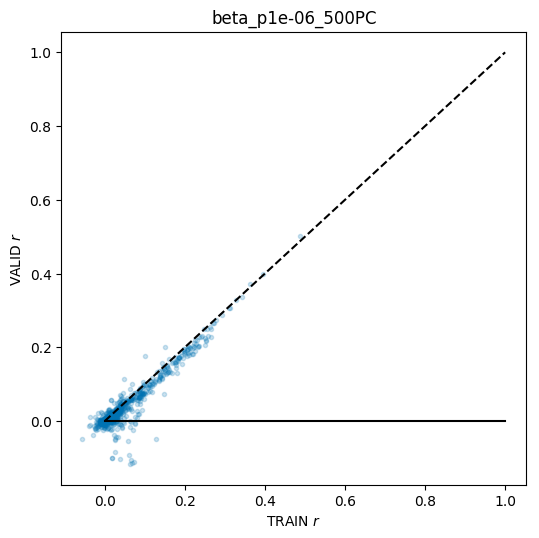

In [17]:
plt.figure(figsize=(6,6), dpi=100)
plt.plot(datas[key]['TRAIN_'+kind], datas[key]['TEST_'+kind], '.', alpha=0.2)
plt.plot([0,1],[0,1],'k--')
plt.plot([0,1],[0,0],'k-')
plt.xlabel('TRAIN '+'$r$'), plt.ylabel('VALID '+'$r$'), plt.title(key)
plt.show()

In [18]:
npzs = glob.glob('/oak/stanford/groups/mrivas/projects/degas-risk/datasets/train/v2/tsvd/*_center_*_20200506_500PCs.npz')
print('\n'.join(map(os.path.basename,npzs)))

all_z_center_p0001_20200506_500PCs.npz
all_z_center_p001_20200506_500PCs.npz
all_beta_center_p1e-05_20200506_500PCs.npz
all_beta_center_p001_20200506_500PCs.npz
all_beta_center_p1e-06_20200506_500PCs.npz
all_beta_center_p00001_20200506_500PCs.npz
all_z_center_p1e-06_20200506_500PCs.npz
all_z_center_p1e-05_20200506_500PCs.npz
all_beta_center_p0001_20200506_500PCs.npz
all_z_center_p00001_20200506_500PCs.npz


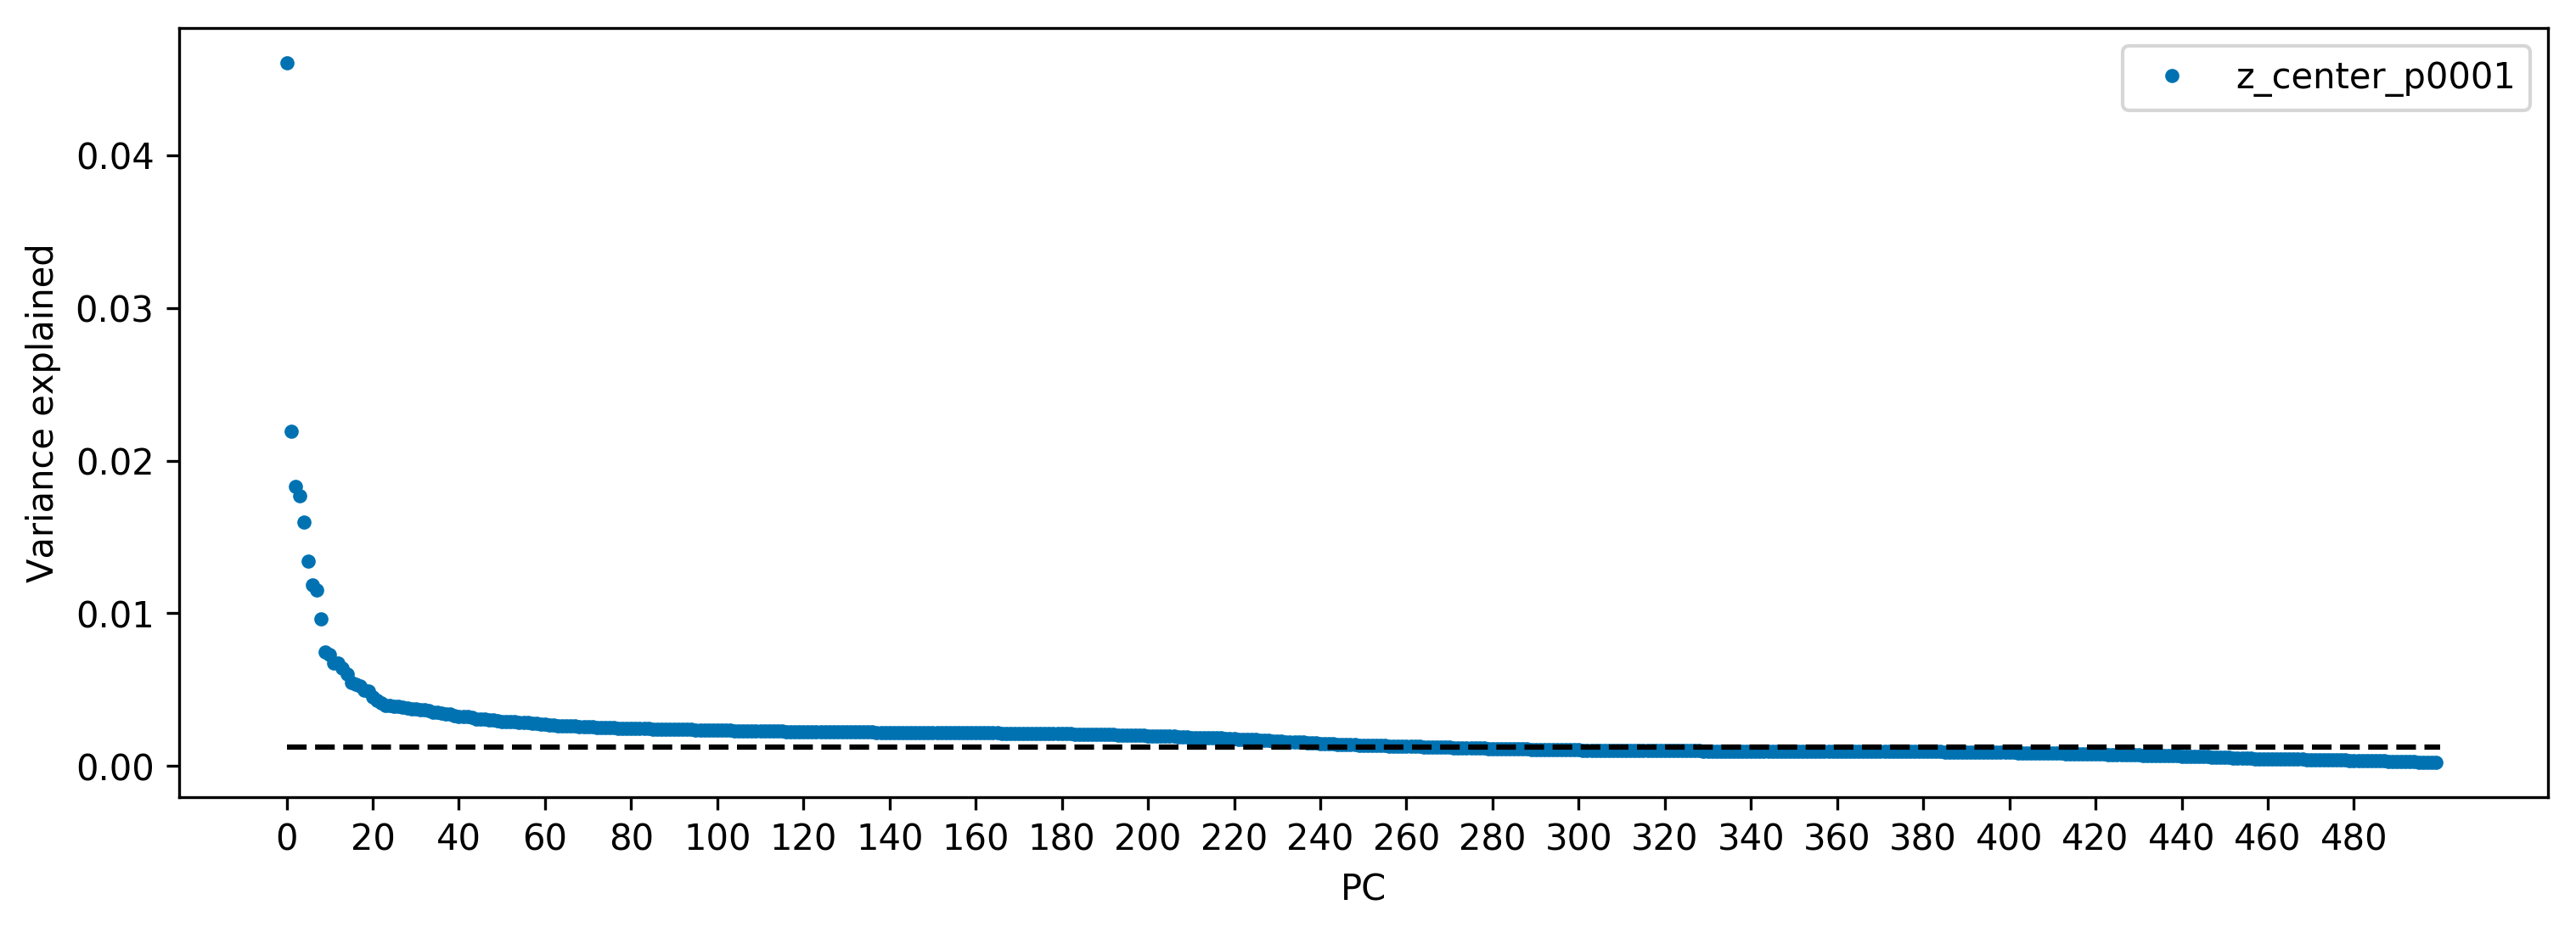

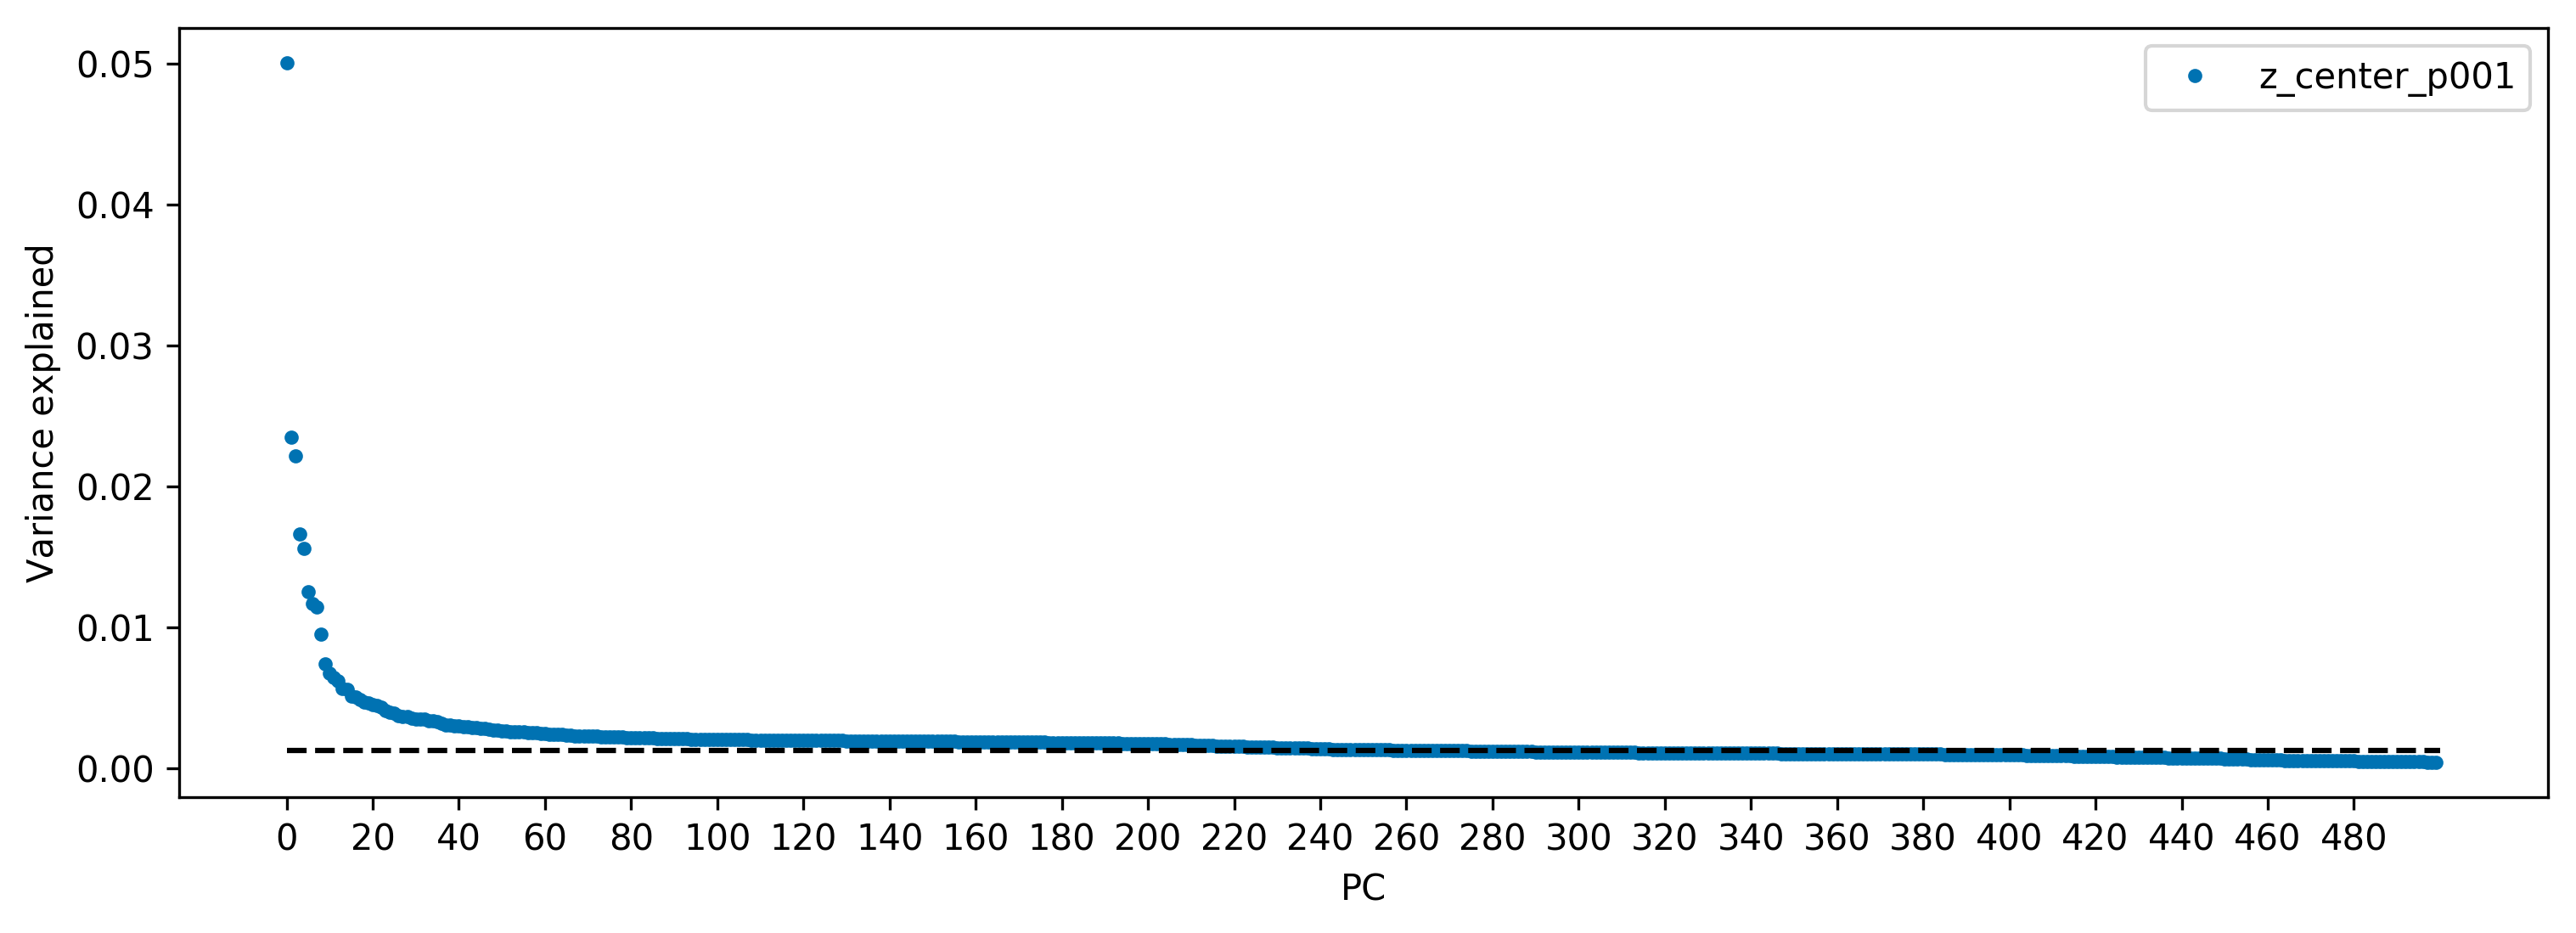

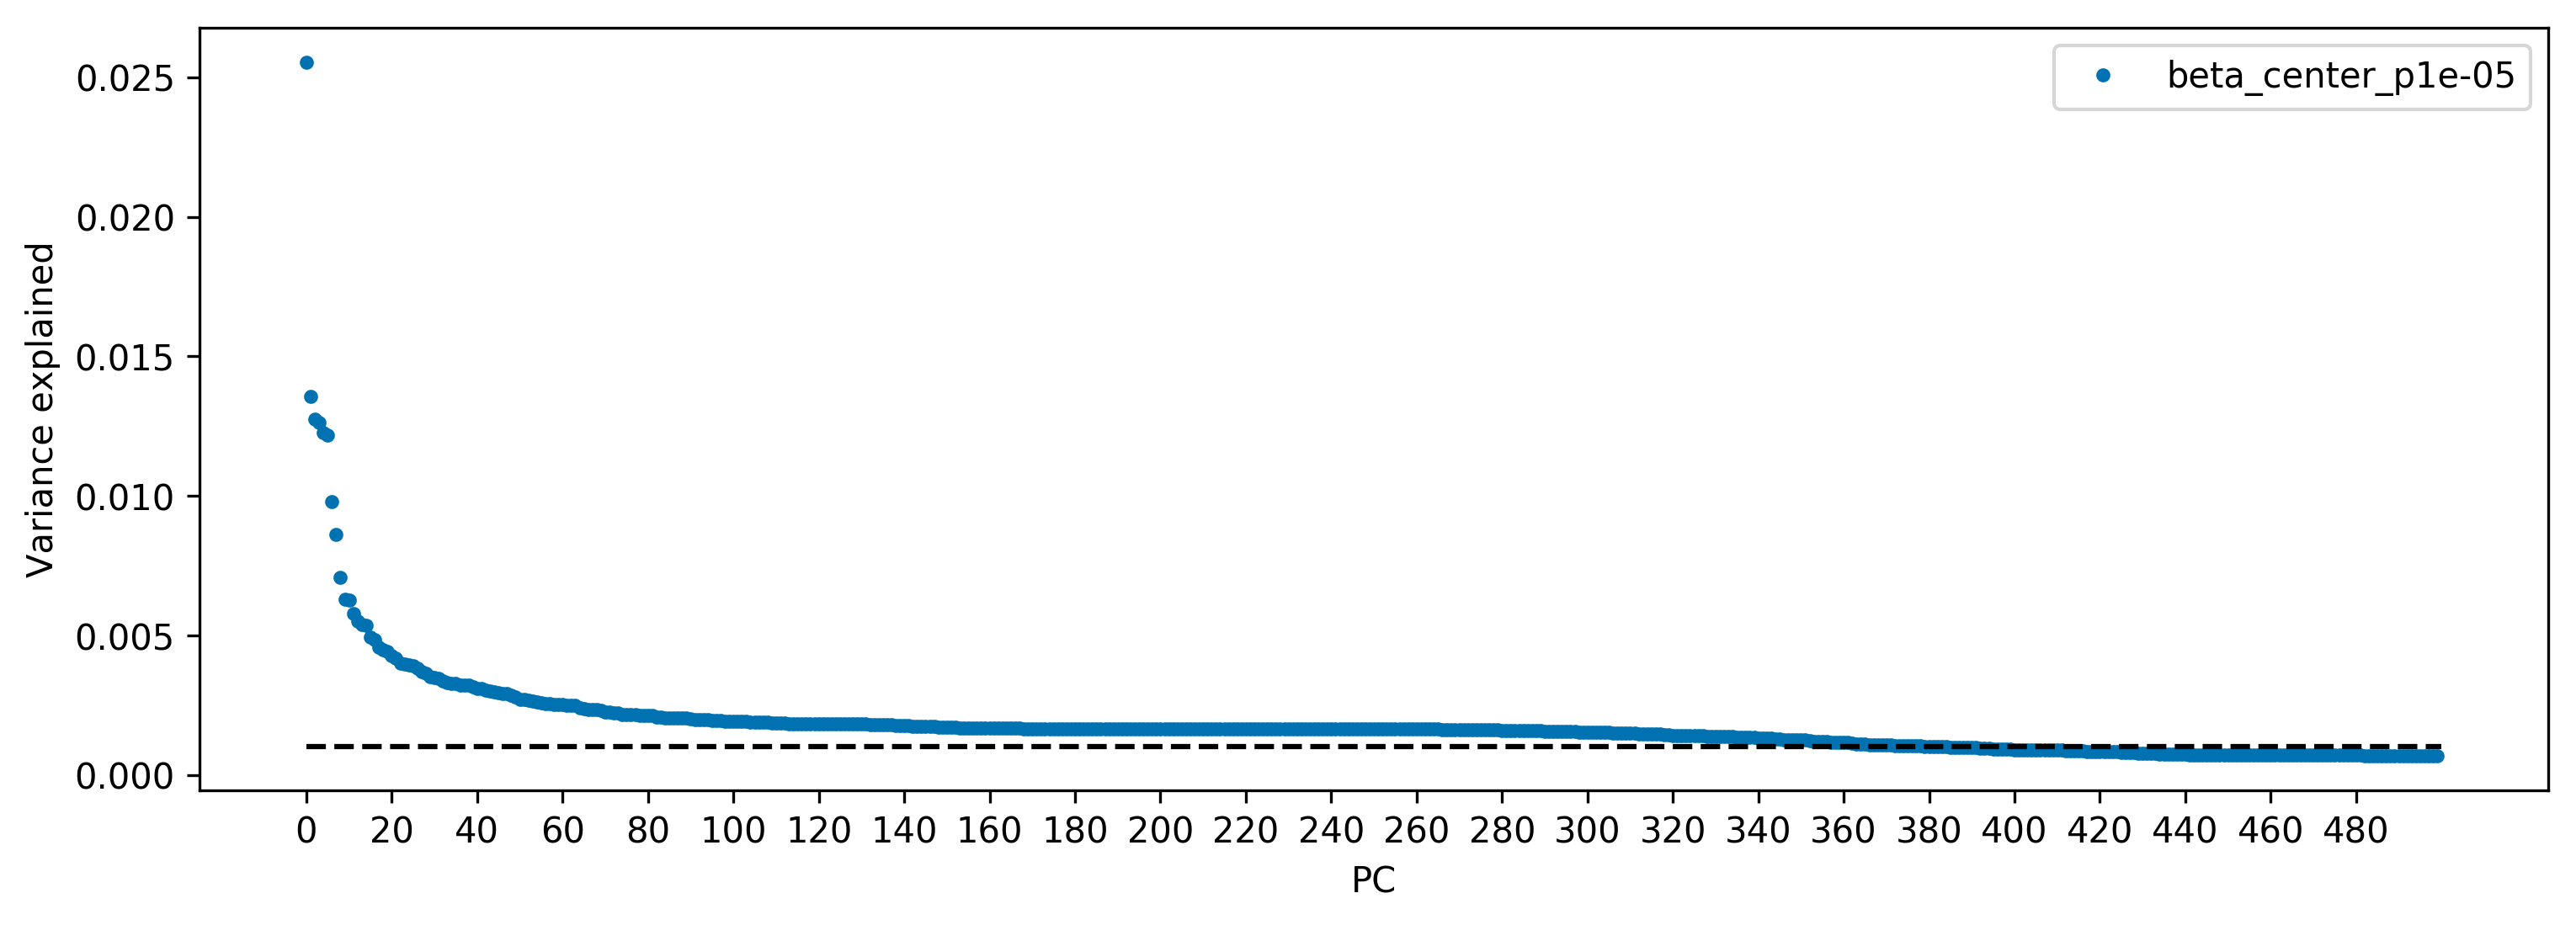

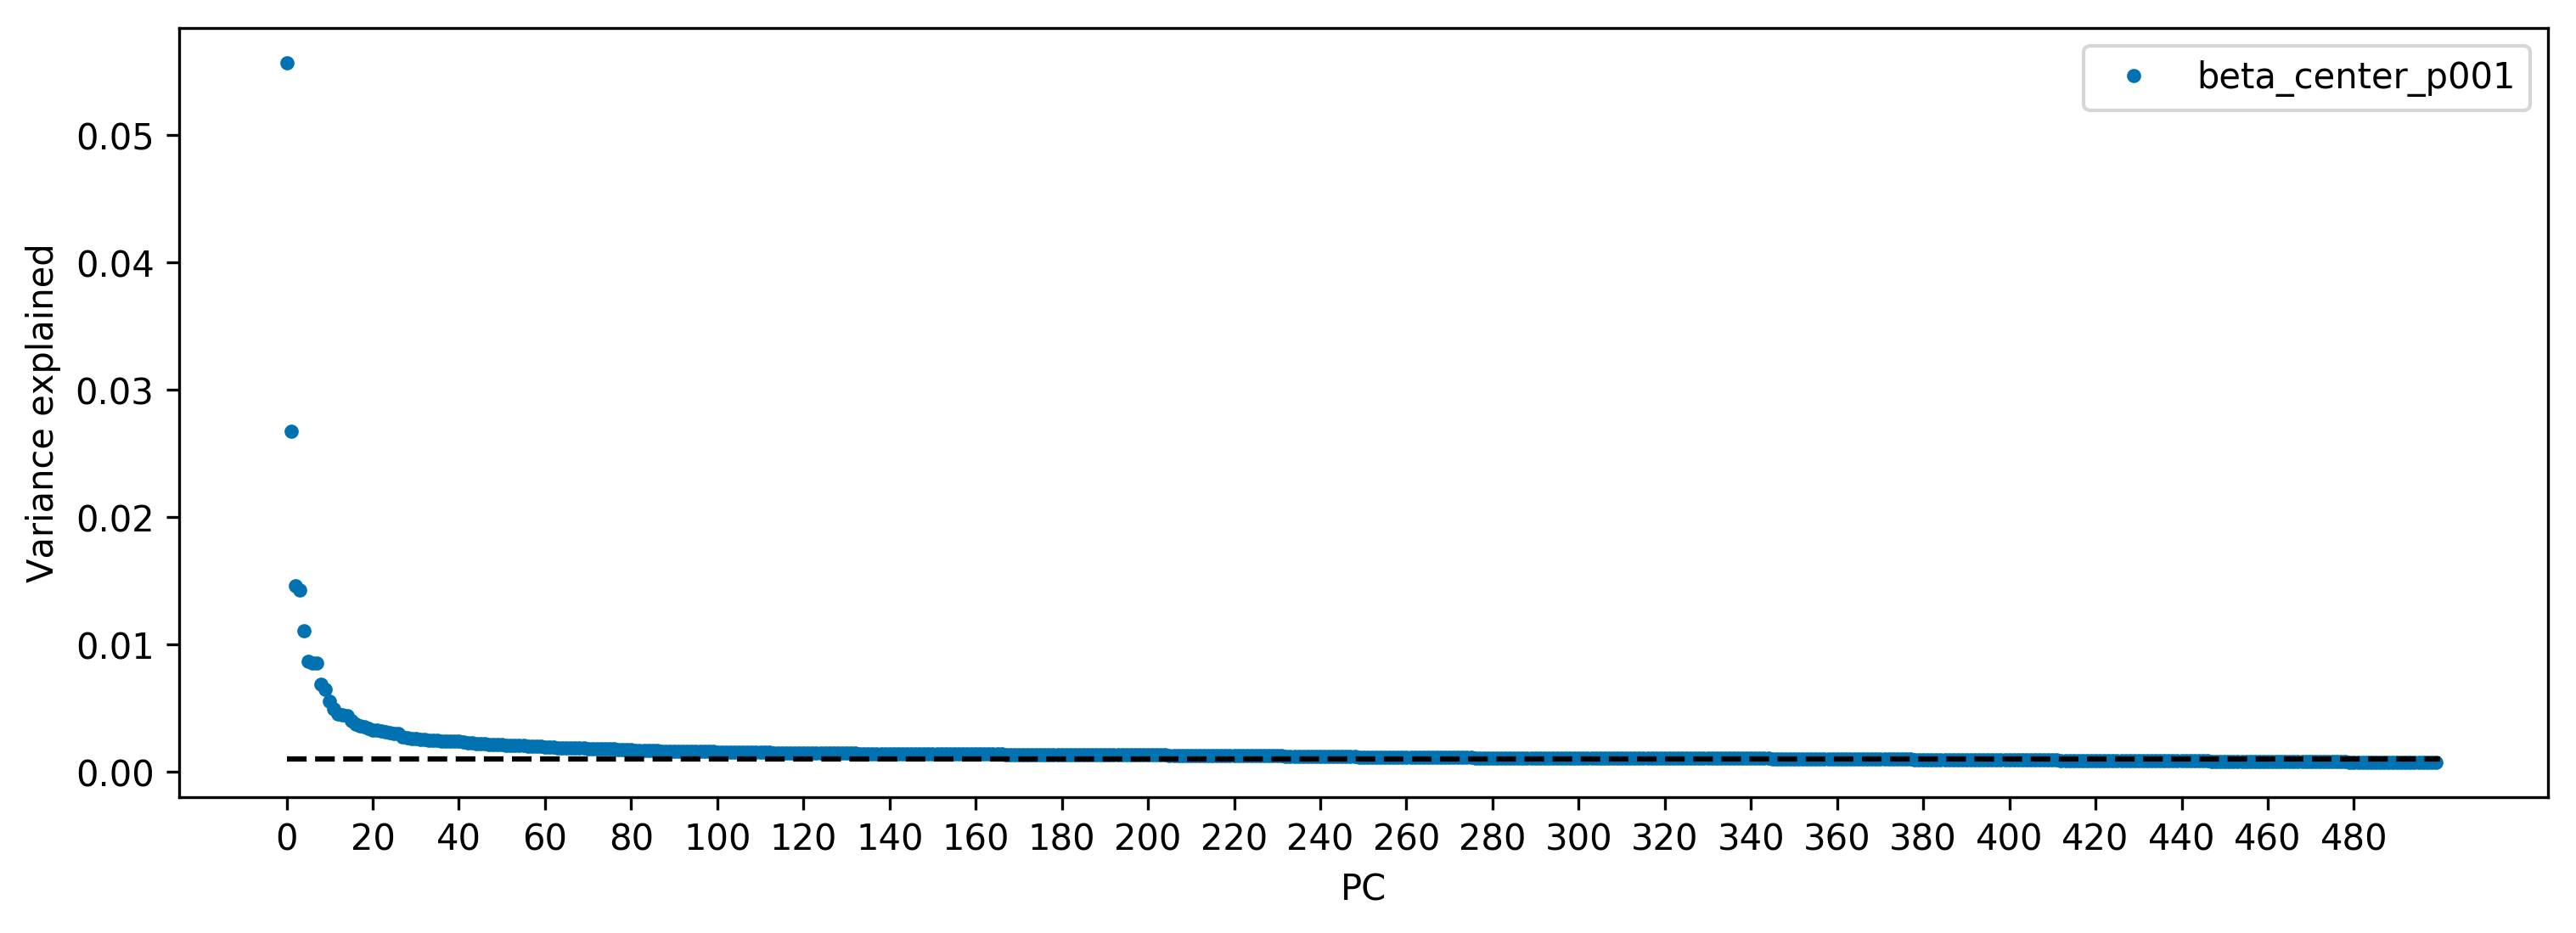

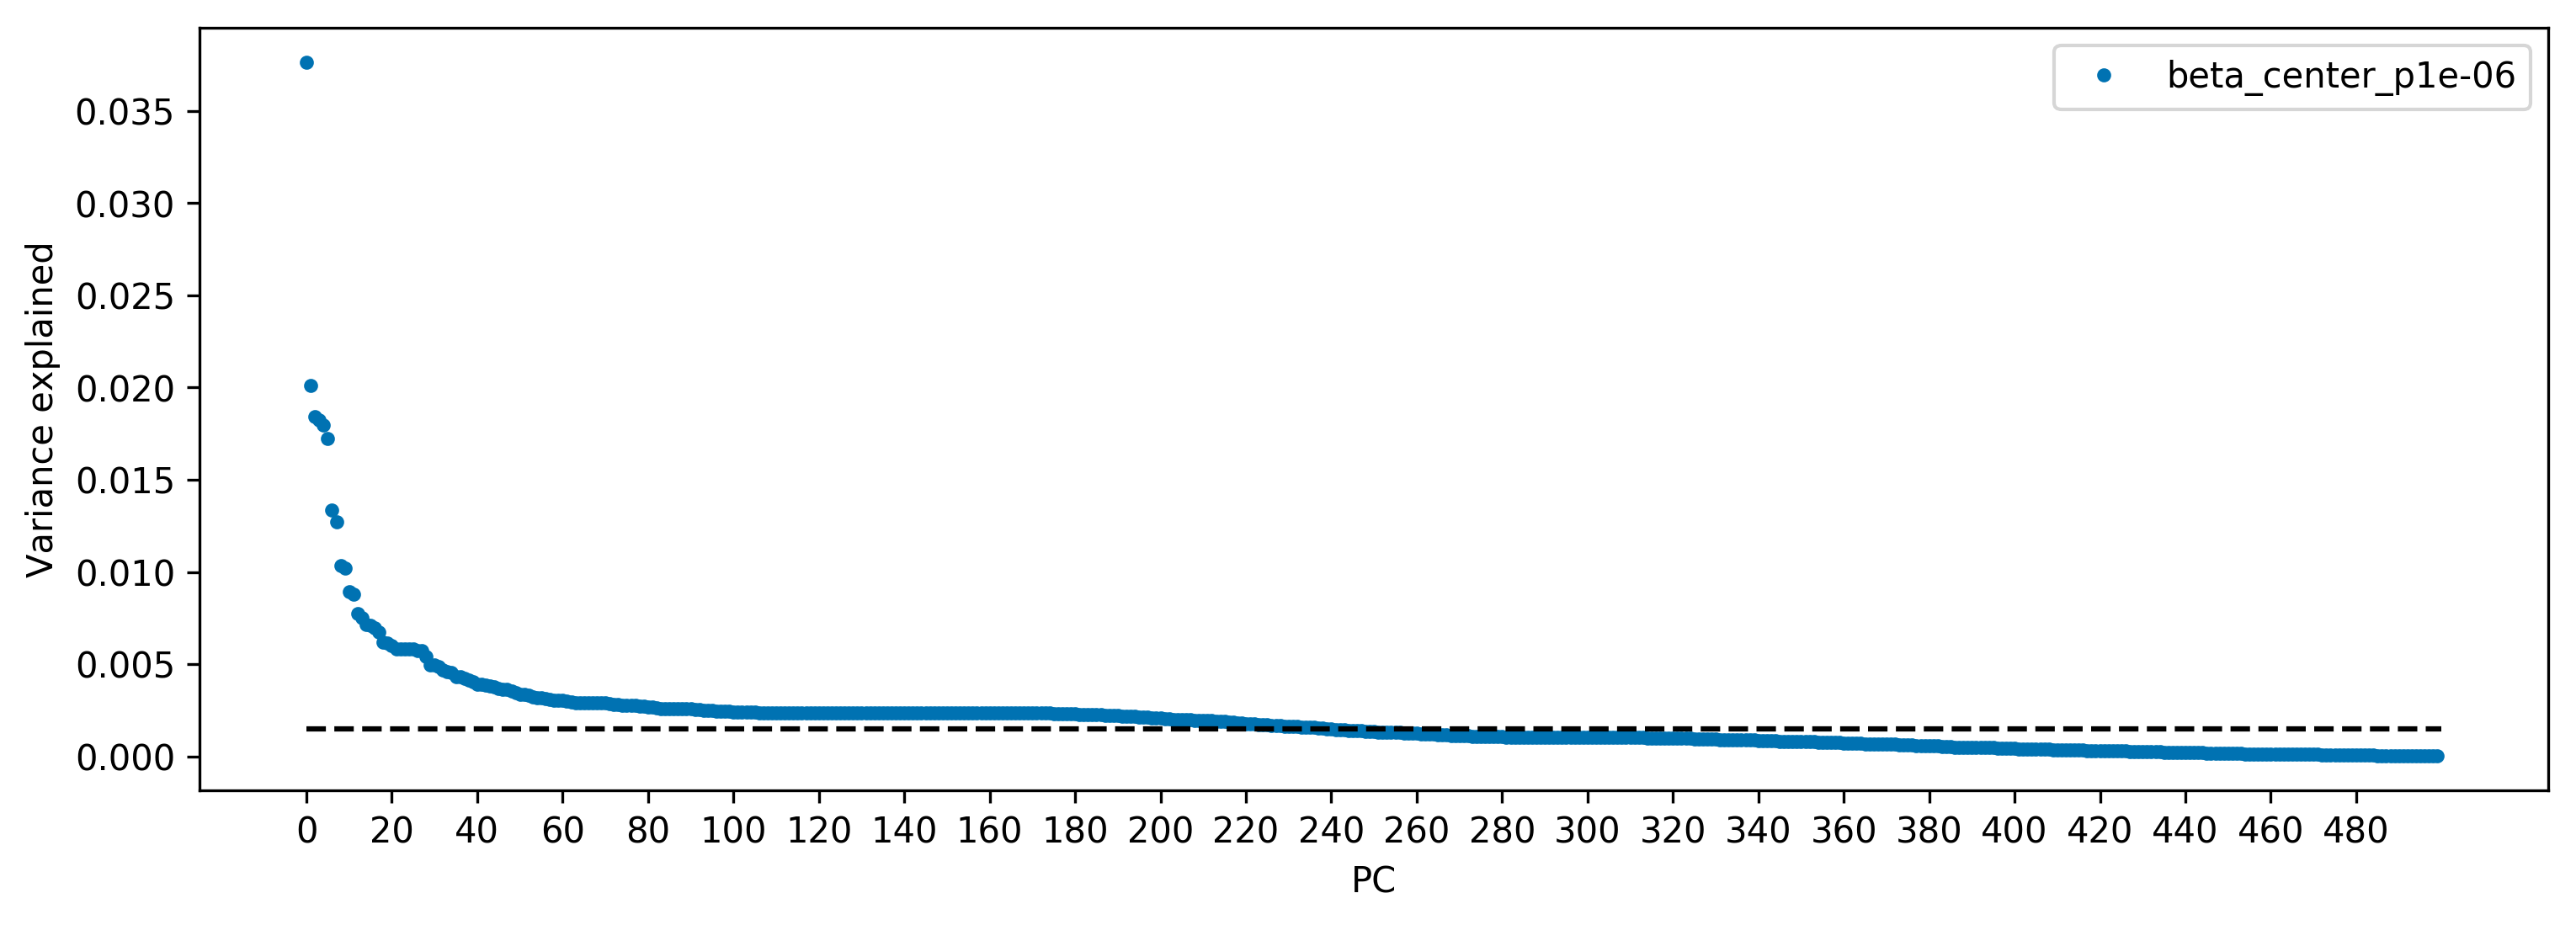

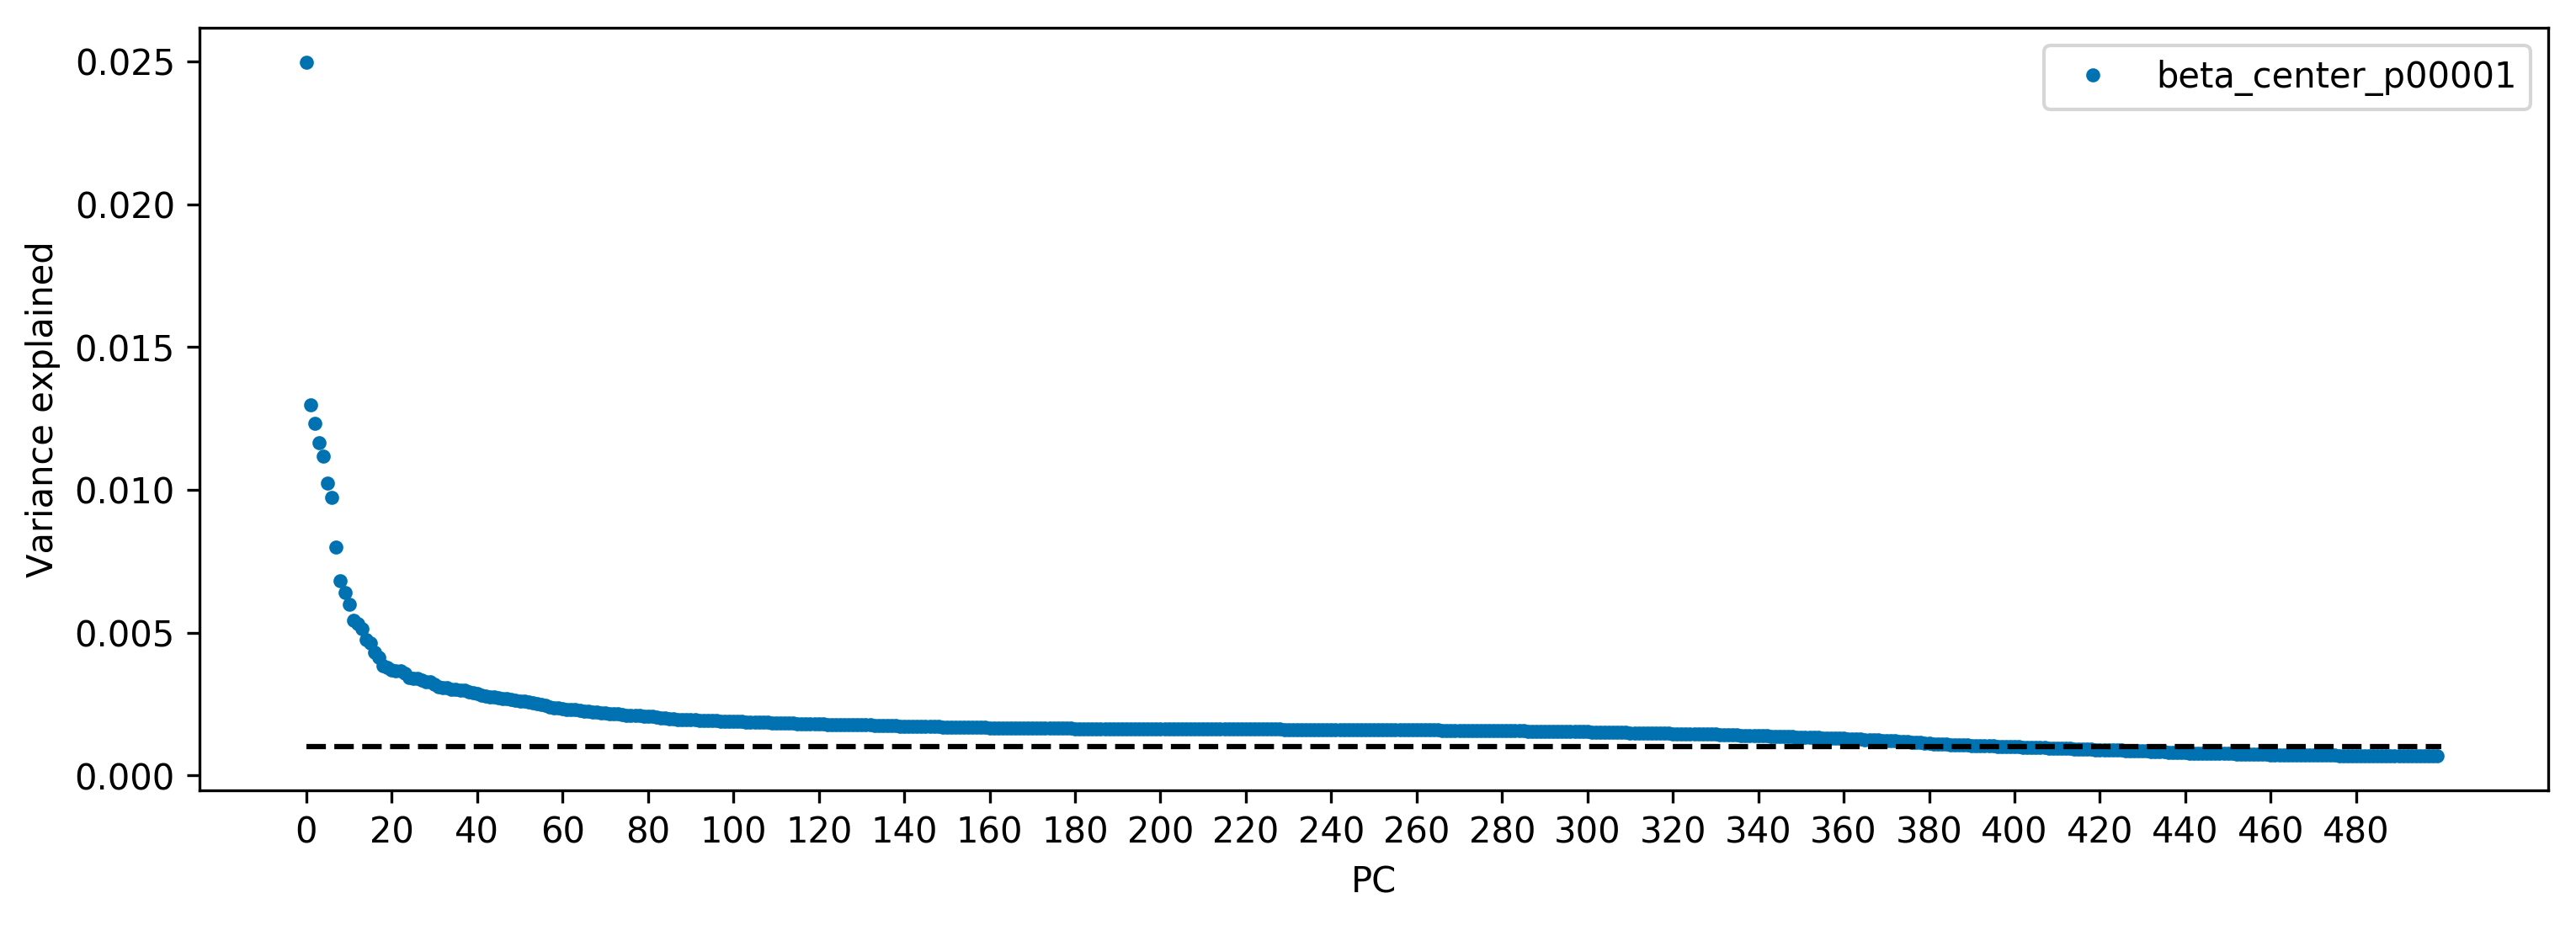

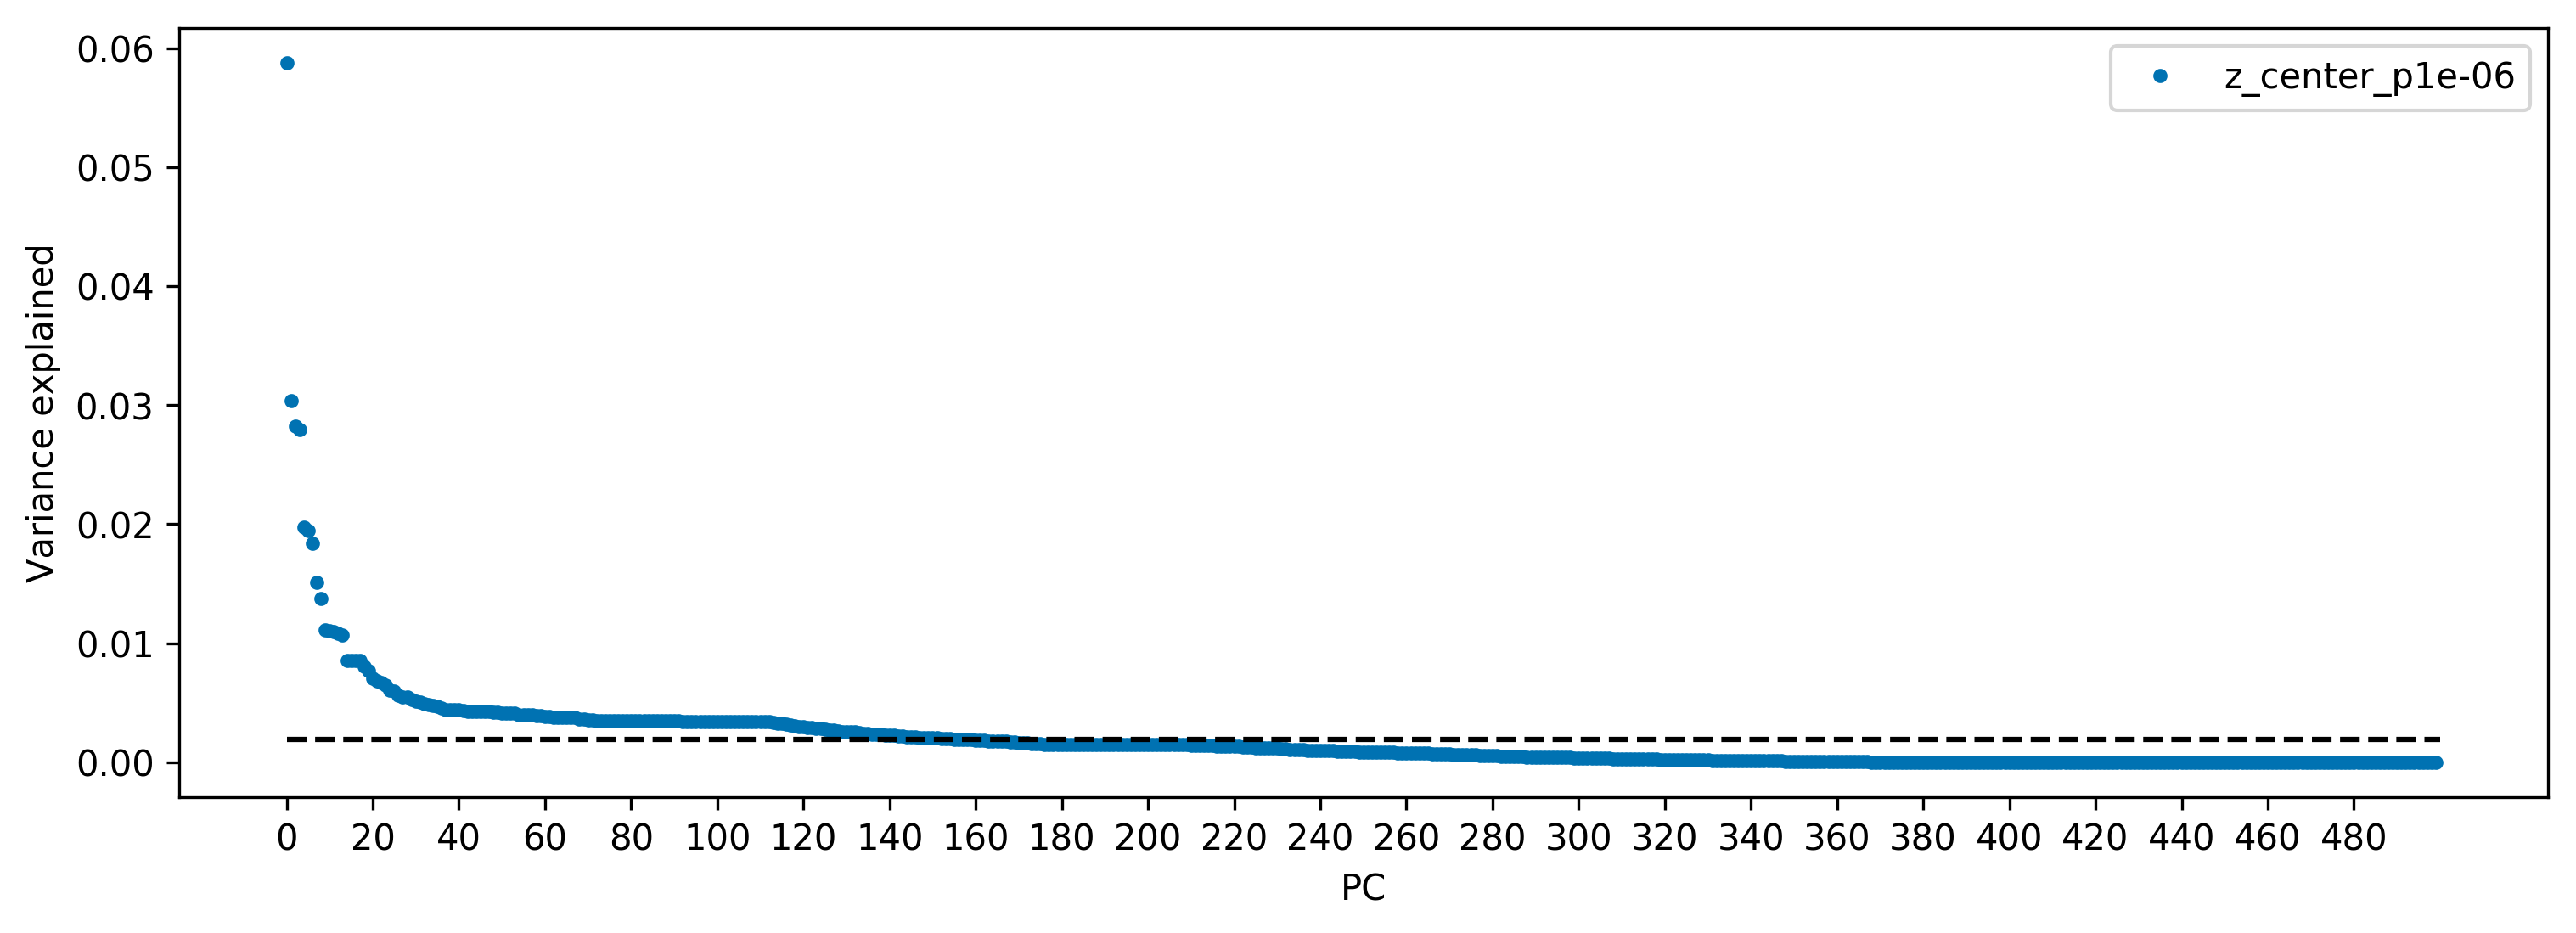

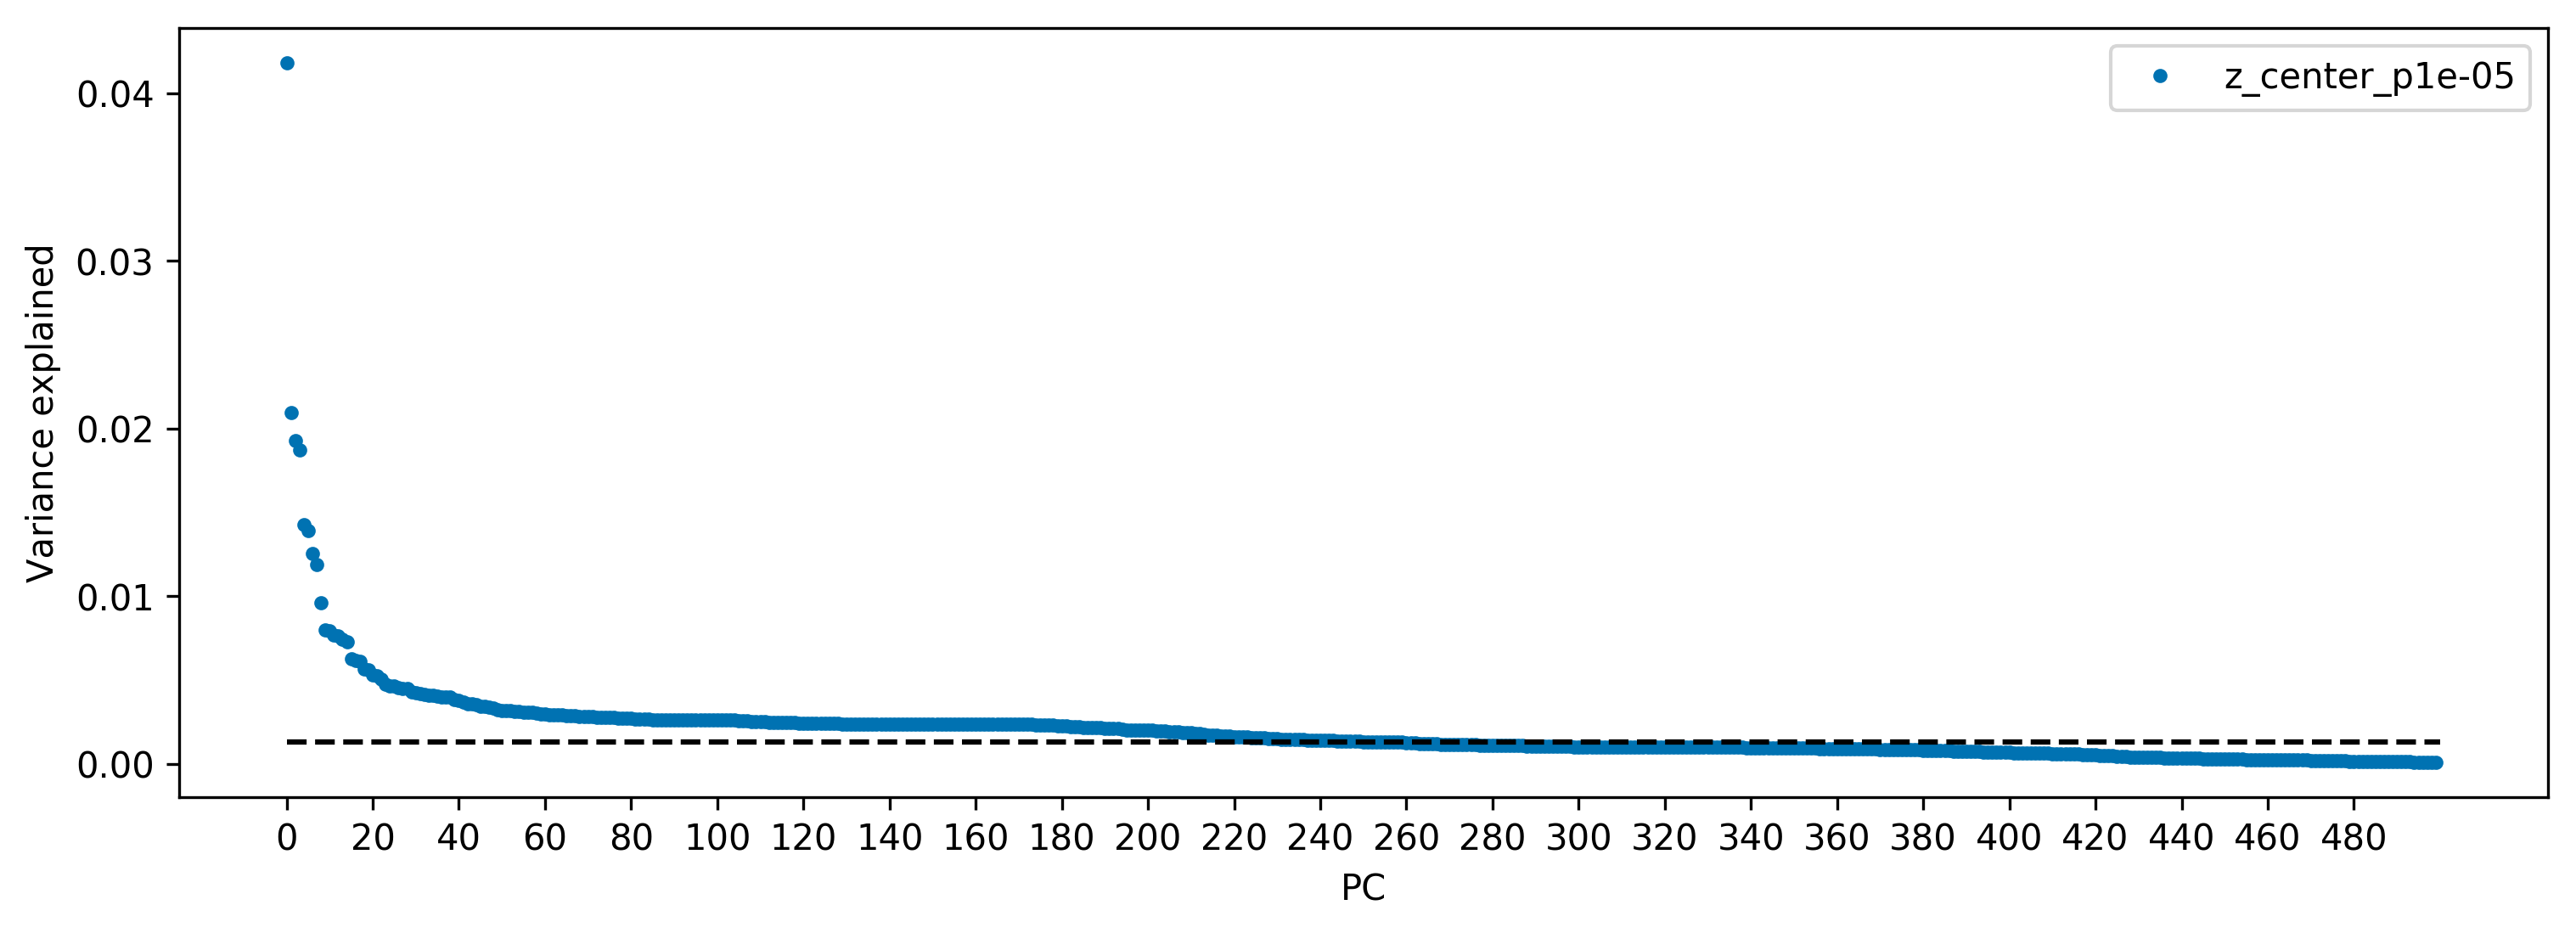

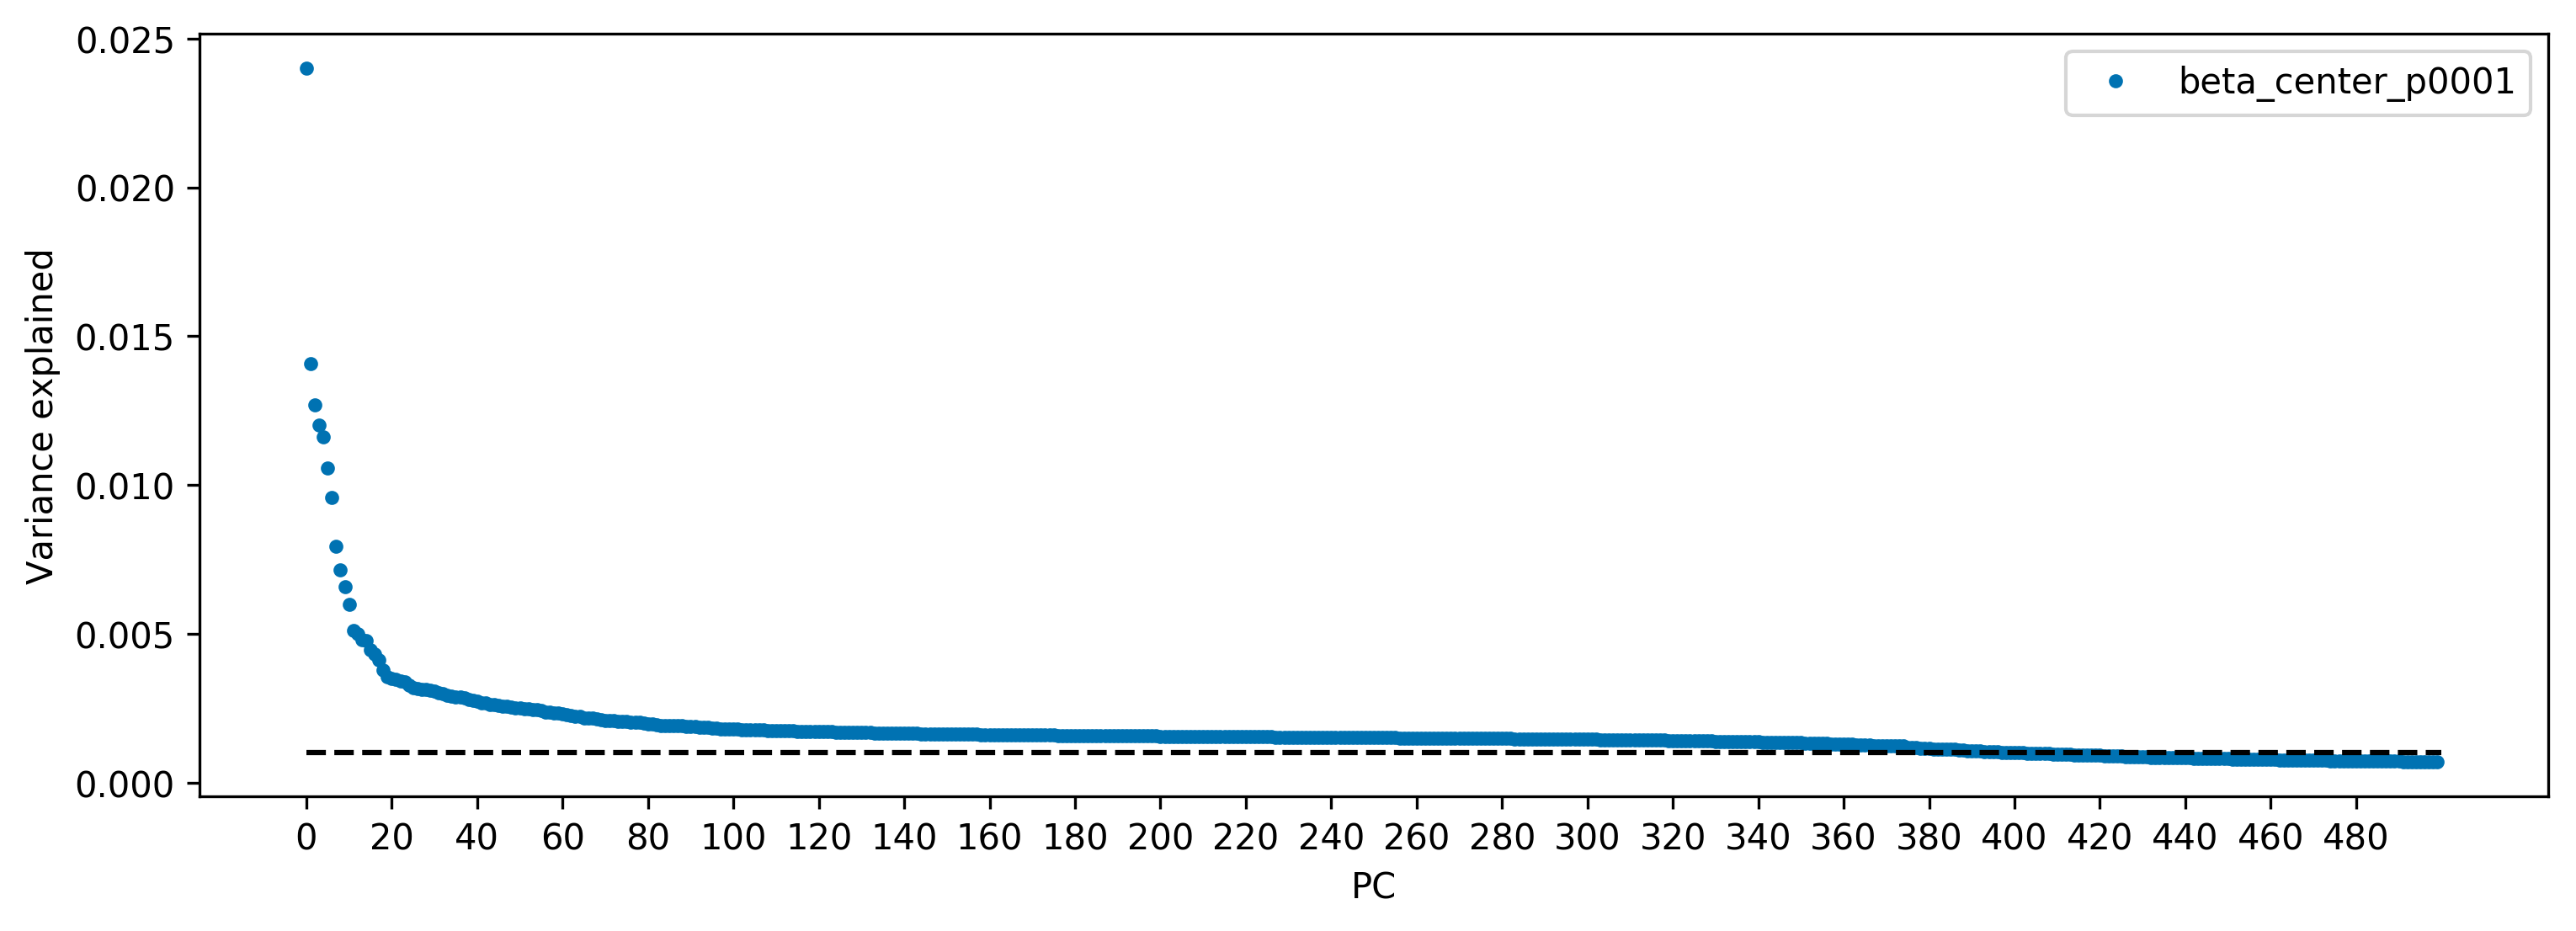

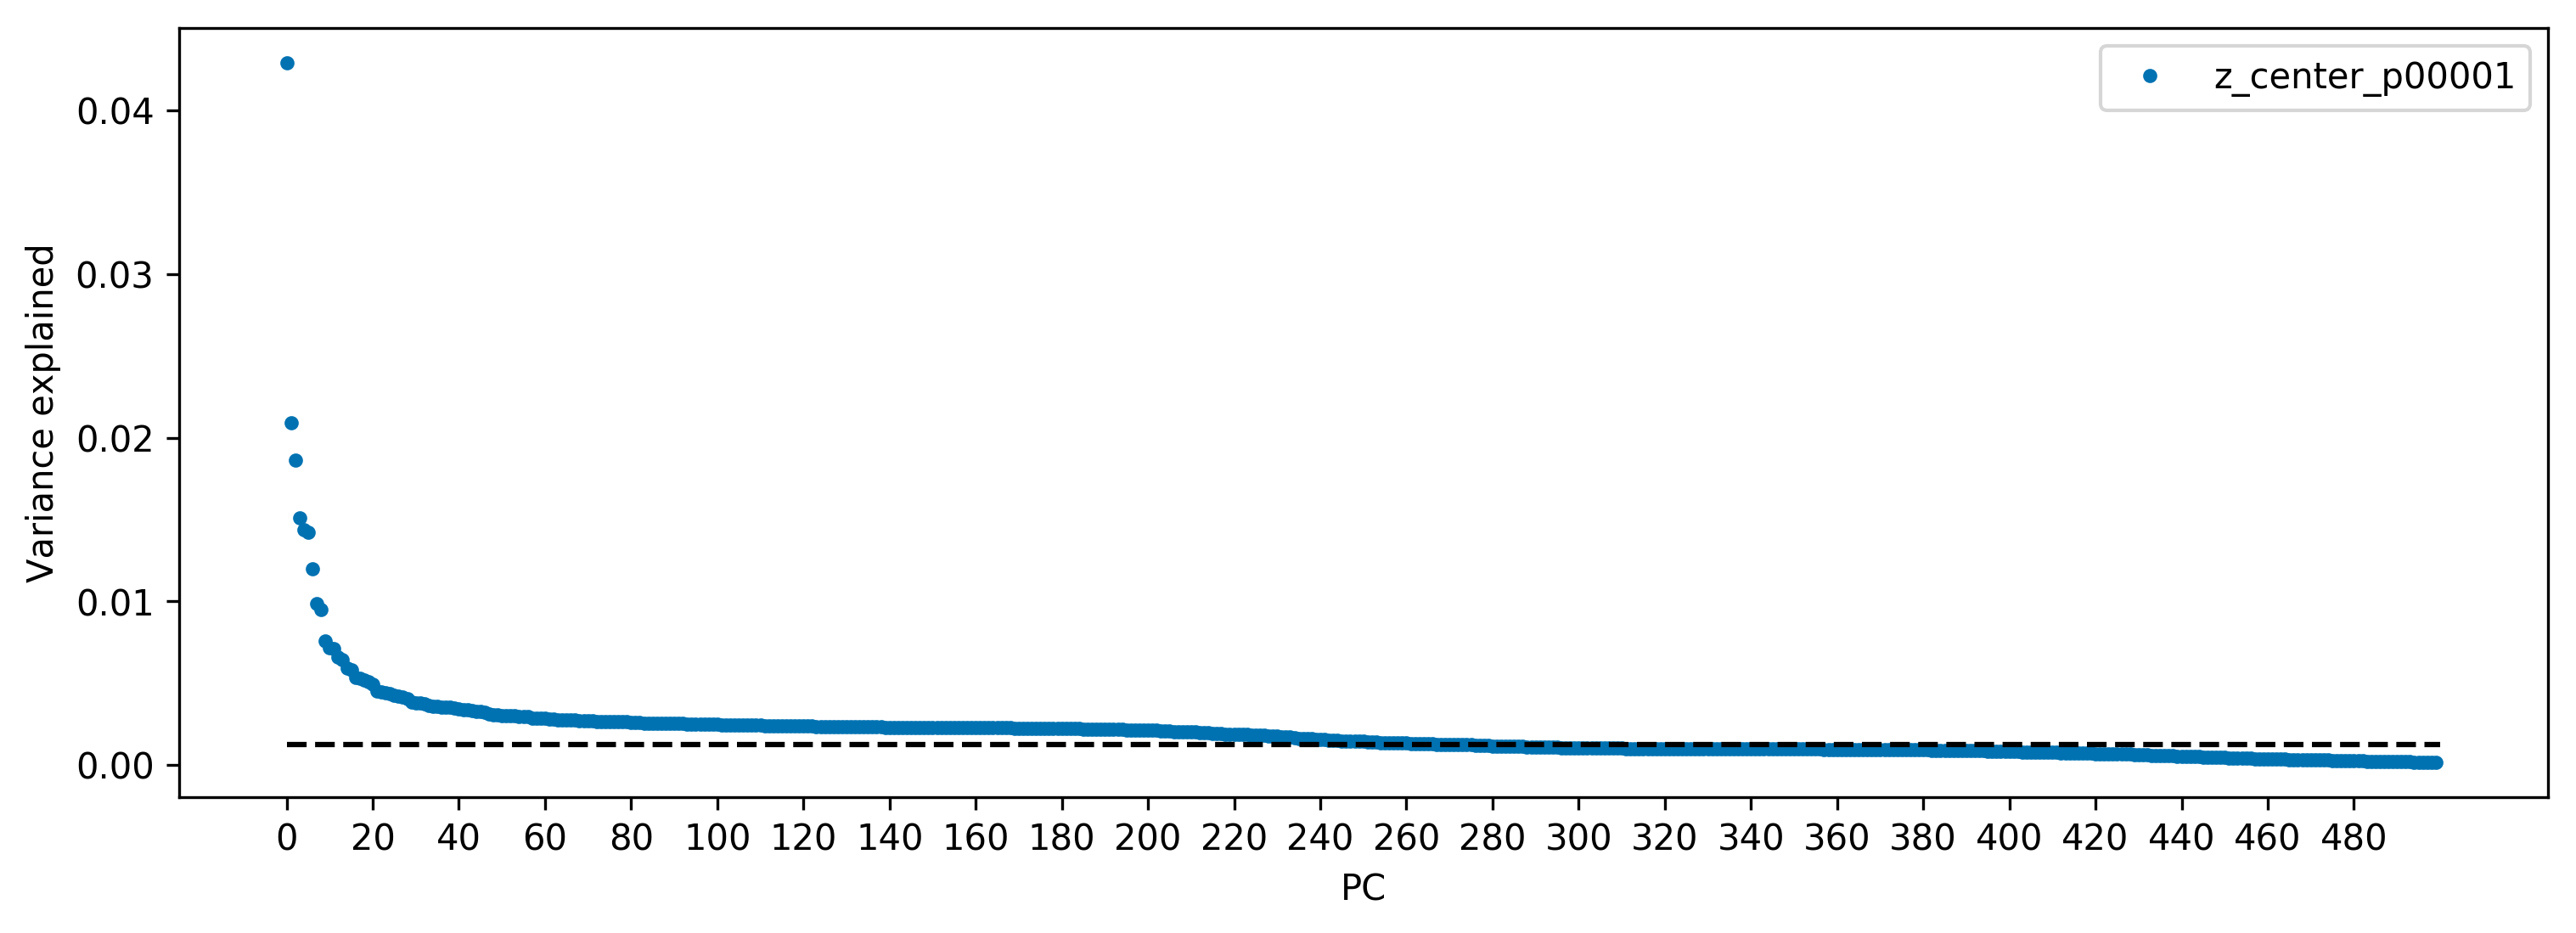

In [19]:
for npz in npzs:
    z=np.load(npz)
    plt.figure(figsize=(12,4), dpi=300)
    plt.plot(np.arange(z['D'].shape[0]), z['variance_explained_ratio'], '.')
    plt.xticks(np.arange(0,z['D'].shape[0],20))
    plt.xlabel('PC'),plt.ylabel('Variance explained')
    plt.plot([0,z['D'].shape[0]],[1.0/z['V'].shape[0],1.0/z['V'].shape[0]], 'k--')
    plt.legend([os.path.splitext(os.path.basename(npz))[0][4:-16]]) #, 'Isotropic variance'])
    plt.show()